In [1]:
import TestImages: testimage
import ImageView: imshow
import Interpolations: LinearInterpolation

In [2]:
img = testimage("mandrill")
(xsize, ysize) = size(img)

(512, 512)

In [3]:
function warp(x, y, p)
    xcenter = p[:xcenter]
    ycenter = p[:ycenter]
    distance = sqrt((xcenter-x)^2 + (ycenter-y)^2)
    mod_ = 0.25*sin(p[:distance_coef]*(distance/(p[:time]+p[:shift]+0.1)))+0.75
    # g(xcenter, x) = convert(Int, floor(xcenter + (x - xcenter)*mod_))
    g(xcenter, x) = xcenter + (x - xcenter)*mod_
    xnew = g(xcenter, x)
    ynew = g(ycenter, y)
    # img[xnew, ynew]
    xnew, ynew
end

warp (generic function with 1 method)

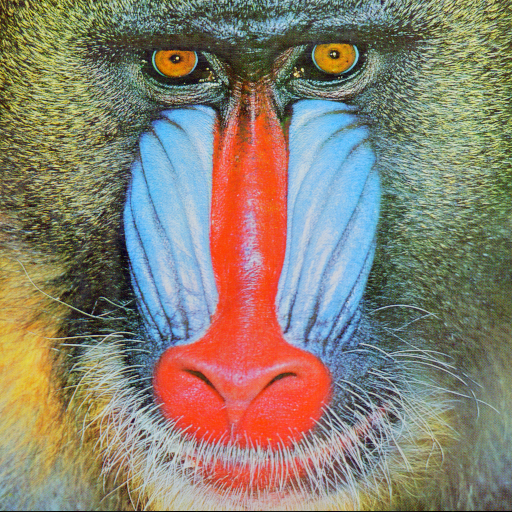

In [4]:
xgrid = 1:xsize
ygrid = 1:ysize
interpolator = LinearInterpolation((xgrid, ygrid), img)

In [5]:
params = Dict(:distance_coef=>0.8, :xcenter=>61, :ycenter=>176)

Dict{Symbol, Real} with 3 entries:
  :distance_coef => 0.8
  :xcenter       => 61
  :ycenter       => 176

In [6]:
floating_coords = [[warp(x, y, params)         
                    for x in xgrid, y in ygrid]
                   for params[:time] in 0:9
                   for params[:shift] in [params[:time]/(1+0.01*params[:time])] # a unit of time is an animation frame
                   ];

In [7]:
length(floating_coords)

10

In [8]:
typeof(floating_coords[1])

Matrix{Tuple{Float64, Float64}} (alias for Array{Tuple{Float64, Float64}, 2})

In [9]:
size(floating_coords[1])

(512, 512)

In [13]:
f1 = floating_coords[1]
println(f1[1,1])
interpolator(f1[1,1][1],f1[1,1][2])

(20.573881875697772, 58.09048880411849)


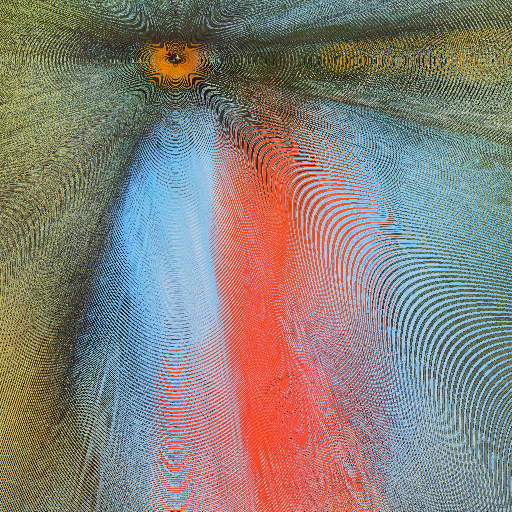

In [14]:
[interpolator(f1[x,y][1],f1[x,y,1][2])
 for x in xgrid, y in ygrid]

In [18]:
imgs = [[interpolator(floating_coords[z][x,y][1],floating_coords[z][x,y,1][2])         
         for x in xgrid, y in ygrid]
        for z in 1:length(floating_coords)
        ];

zsize = length(imgs)

10

,,,,,,,,,

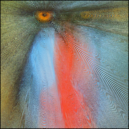
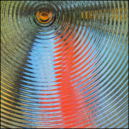
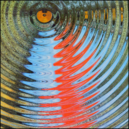
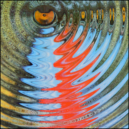
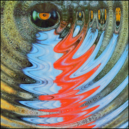
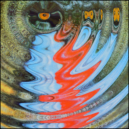
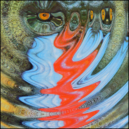
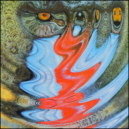
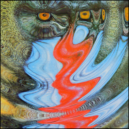
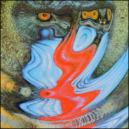

In [20]:
imgs

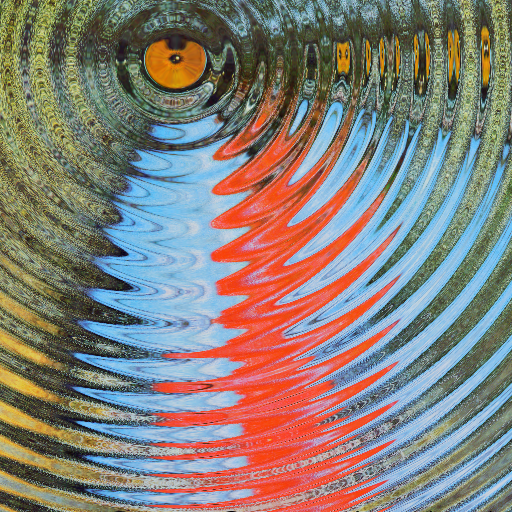

In [21]:
imgs[3]

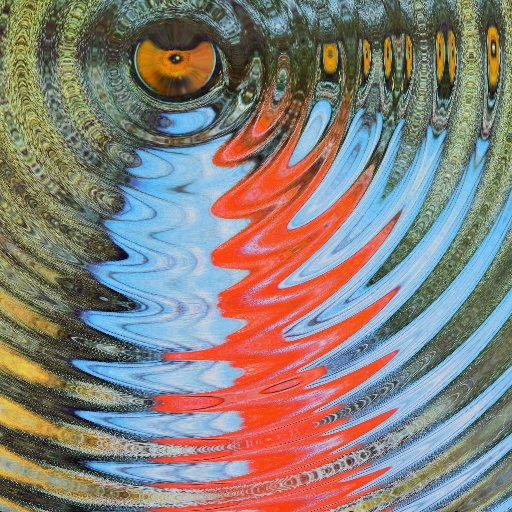

In [22]:
imgs[4]

In [23]:
# use ConstantInterpolation instead of LinearInterpolation for better crispness
# we are using this one only keeping automated differentiation in mind